For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested


    Has the network latency gone up since we switched internet service providers?

Is the website redesign any good?

Is our television ad driving more sales?

EXERCISES II

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statistics
from pydataset import data

In [ ]:


# $H_0$= The sales time at office #1 is equivalent to the sales time at office #2  

# $H_1$= The sales time on average at office #1 are inequal to the average sales time at office #2

# Significance level  = 0.05


n_1=40
avg_1= 90
stand_dev1=15

n_2=50
avg_2= 90
stand_dev2=20

α=.05


stats.ttest__ind()







    Load the mpg dataset and use it to answer the following questions:

        Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [17]:
mpg= data('mpg')
# eff_1999= mpg[mpg.model_year== 99]
# eff_1999
mpg

manufacturer   model  displ  year  cyl       trans drv  cty  hwy fl  \
1           audi      a4    1.8  1999    4    auto(l5)   f   18   29  p   
2           audi      a4    1.8  1999    4  manual(m5)   f   21   29  p   
3           audi      a4    2.0  2008    4  manual(m6)   f   20   31  p   
4           audi      a4    2.0  2008    4    auto(av)   f   21   30  p   
5           audi      a4    2.8  1999    6    auto(l5)   f   16   26  p   
..           ...     ...    ...   ...  ...         ...  ..  ...  ... ..   
230   volkswagen  passat    2.0  2008    4    auto(s6)   f   19   28  p   
231   volkswagen  passat    2.0  2008    4  manual(m6)   f   21   29  p   
232   volkswagen  passat    2.8  1999    6    auto(l5)   f   16   26  p   
233   volkswagen  passat    2.8  1999    6  manual(m5)   f   18   26  p   
234   volkswagen  passat    3.6  2008    6    auto(s6)   f   17   26  p   

       class  
1    compact  
2    compact  
3    compact  
4    compact  
5    compact  
..       ...  
230  midsize  
231  midsize  
232  midsize  
233  midsize  
234  midsize  

[234 rows x 11 columns]

0    70
1    70
2    70
3    70
4    70
Name: model_year, dtype: int64

Are compact cars more fuel-efficient than the average car?

Do manual cars get better gas mileage than automatic cars?

EXERCISES III (CORRELATION)

1. Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?



In [22]:
# $H_0$= there is no linear correlation between tenure and monthly charges.

# $h_1$= there is a linear relation between tenure and monthly charges.


telco_churn= pd.read_csv('/Users/joebennett/Downloads/telco_churn (1).csv')



In [36]:
active_cust.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
3  No phone service             DSL            Yes  ...              Yes   
6               Yes     Fiber optic             No  ...               No   
7  No phone service             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
3         Yes          No              No        One year               No   
6          No         Yes              No  Month-to-month              Yes   
7          No          No              No  Month-to-month               No   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
3  Bank transfer (automatic)          42.30       1840.75    No  
6    Credit card (automatic)          89.10        1949.4    No  
7               Mailed check          29.75         301.9    No  

[5 rows x 21 columns]

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


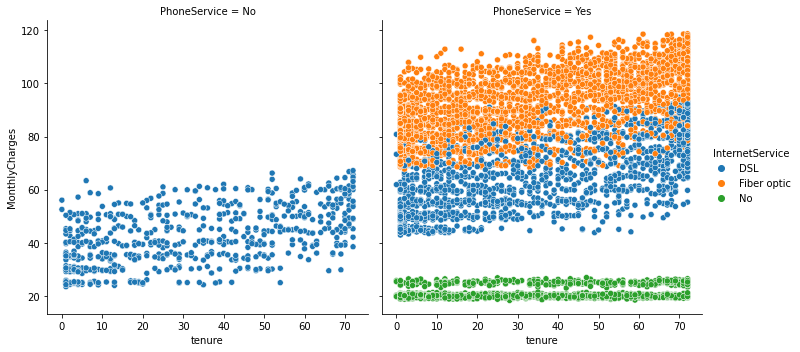

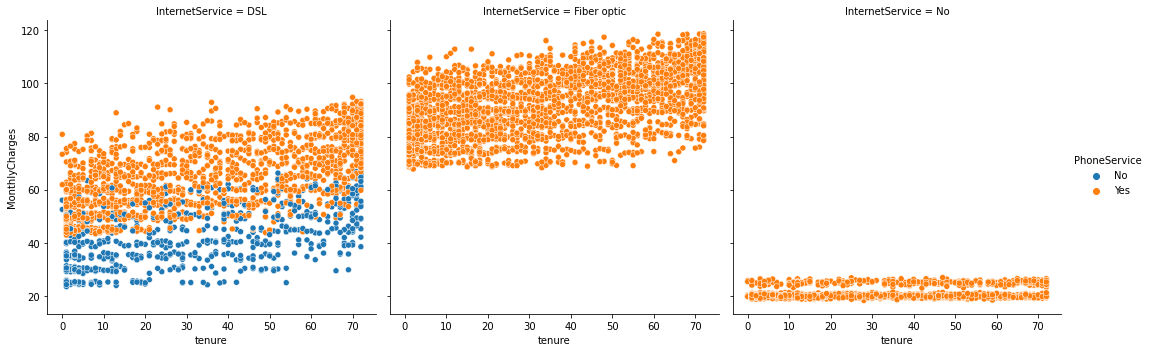

In [65]:

active_cust= telco_churn

tenure=active_cust.tenure
month_char=active_cust['MonthlyCharges']

sns.relplot(tenure,month_char, col= active_cust.PhoneService, hue= active_cust.InternetService)
r, p = stats.pearsonr(tenure, month_char)




sns.relplot(tenure,month_char, col= active_cust.InternetService, hue= active_cust.PhoneService)



plt.show()

In [50]:
alpha= .05

r,p = stats.pearsonr(tenure,month_char)

print('r=',r)
print('p=',p)




if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")



    

r= 0.3308923902576852
p= 1.9541002600116183e-132
We reject the null hypothesis


In [83]:


phone_dsl= active_cust[(active_cust.PhoneService== 'Yes') & (active_cust.InternetService=='DSL')]
phone_fiber=active_cust[(active_cust.PhoneService== 'Yes') & (active_cust.InternetService=='Fiber optic')]
phone_no_internet=active_cust[(active_cust.PhoneService== 'Yes') & (active_cust.InternetService=='No')]
no_phone_dsl=active_cust[(active_cust.PhoneService== 'No') & (active_cust.InternetService=='DSL')]
no_phone_fiber=active_cust[(active_cust.PhoneService== 'No') & (active_cust.InternetService=='Fiber optic')]
no_phone_no_internet=active_cust[(active_cust.PhoneService== 'No') & (active_cust.InternetService=='No')]
no_phone_no_internet

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]

In [86]:
def corr_finder(df):
    r,p=stats.pearsonr(df.tenure, df.MonthlyCharges)
    return print(f'r= {r}, p={p}') 


corr_finder(phone_dsl)
corr_finder(phone_fiber) 
corr_finder(phone_no_internet) 
corr_finder(no_phone_dsl)
#corr_finder(no_phone_fiber)
#corr_finder(no_phone_no_internet)

r= 0.6553845618157269, p=5.676202683634236e-214
r= 0.6246206176175604, p=0.0
r= 0.34232562306194525, p=3.356186955195866e-43
r= 0.5857597986661374, p=4.6033703473404816e-64


2.  Use the employees database.

    Is there a relationship between how long an employee has been with the company and their salary?

In [90]:
from env import get_db_url 

get_db_url('employees')

employees = ''''''


SyntaxError: invalid syntax (1677670821.py, line 5)

Is there a relationship between how long an employee has been with the company and the number of titles they have had?

3. Use the sleepstudy data. Is there a relationship between days and reaction time?